In [3]:
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [3]:
df=pd.read_csv(r"./train.csv")
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

df["class"] = df["diagnosis"].map(diagnosis_dict_binary.get)
df["type"]= df["diagnosis"].map(diagnosis_dict.get)

In [5]:
df.head()

,id_code,diagnosis,class,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

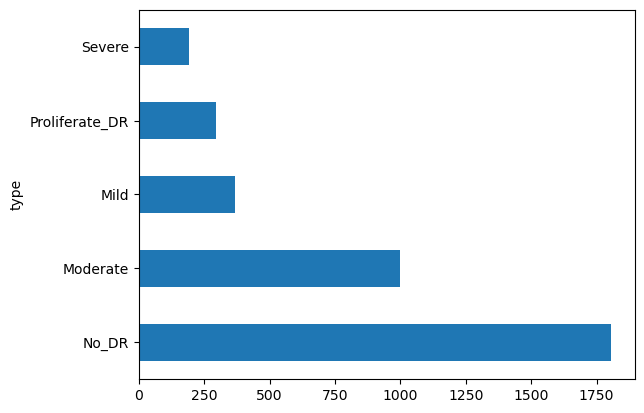

In [6]:
df["type"].value_counts().plot(kind="barh")

In [7]:
train_pre,val= train_test_split(df,test_size=0.15,stratify=df["type"],random_state=42)
train,test = train_test_split(train_pre,test_size=0.15/(1-0.5),stratify=train_pre["type"],random_state=42)

In [8]:
test.shape

(934, 4)

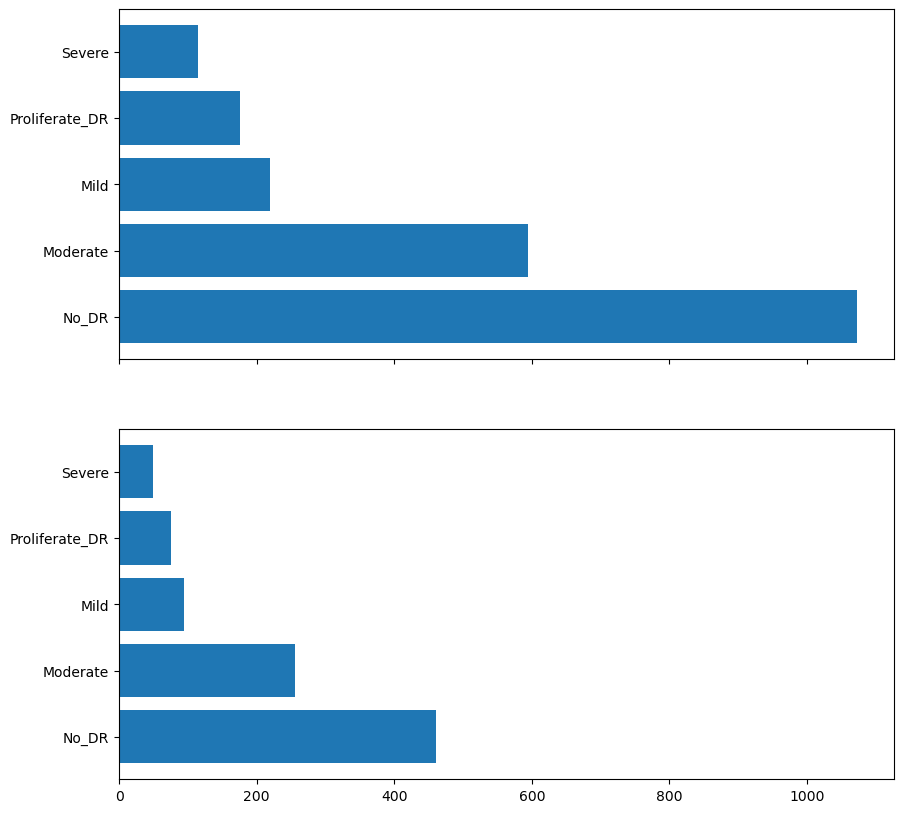

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 10))

# Plot on the first subplot
ax[0].barh(train["type"].value_counts().index, train["type"].value_counts().values)

# Plot on the second subplot
ax[1].barh(test["type"].value_counts().index, test["type"].value_counts().values)

# Show the plot
plt.show()

In [10]:
base_dir=""
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
     shutil.rmtree(base_dir)

if os.path.exists(train_dir):
     shutil.rmtree(train_dir)
os.mkdir(train_dir)

if os.path.exists(val_dir):
     shutil.rmtree(val_dir)
os.mkdir(val_dir)

if os.path.exists(test_dir):
     shutil.rmtree(test_dir)
os.mkdir(test_dir)

In [11]:
src=r"./gaussian_filtered_images"
path=[]
for entry in os.scandir(src):
    if entry.is_dir:
        if entry.name == "export.pkl":
            continue
        else:
            for j in os.scandir(entry.path):
                if j.is_file:
                    path.append(j.path)

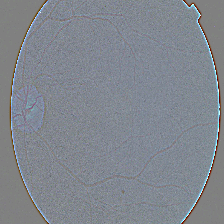

In [12]:
img1=cv2.imread(path[0])
img1=array_to_img(img1)
img1

In [13]:
from tensorflow.keras.preprocessing.image import array_to_img
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['class']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['class']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src, diagnosis, id_code)   
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['class']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [14]:
src=r"./gaussian_filtered_images"
train_path = 'train'
val_path = 'val'""
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2178 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 934 images belonging to 2 classes.


In [15]:
# Assuming you have already created the train_batches generator

# Extract a batch from the generator
batch_images, batch_labels = next(train_batches)
# Print the shape of the batch
print("Batch images shape:", batch_images.shape)
print("Batch labels shape:", batch_labels.shape)

# Convert labels to their corresponding class indices
class_indices = train_batches.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Print the labels in this batch
for i, label_index in enumerate(batch_labels):
    label = class_labels[np.argmax(label_index)]
    print("Image {} belongs to class: {}".format(i, label))


Batch images shape: (32, 224, 224, 3)
Batch labels shape: (32, 2)
Image 0 belongs to class: No_DR
Image 1 belongs to class: No_DR
Image 2 belongs to class: No_DR
Image 3 belongs to class: No_DR
Image 4 belongs to class: DR
Image 5 belongs to class: DR
Image 6 belongs to class: DR
Image 7 belongs to class: DR
Image 8 belongs to class: No_DR
Image 9 belongs to class: DR
Image 10 belongs to class: No_DR
Image 11 belongs to class: No_DR
Image 12 belongs to class: No_DR
Image 13 belongs to class: No_DR
Image 14 belongs to class: No_DR
Image 15 belongs to class: No_DR
Image 16 belongs to class: No_DR
Image 17 belongs to class: DR
Image 18 belongs to class: DR
Image 19 belongs to class: DR
Image 20 belongs to class: DR
Image 21 belongs to class: DR
Image 22 belongs to class: DR
Image 23 belongs to class: No_DR
Image 24 belongs to class: DR
Image 25 belongs to class: No_DR
Image 26 belongs to class: No_DR
Image 27 belongs to class: DR
Image 28 belongs to class: No_DR
Image 29 belongs to class:

In [16]:
from tensorflow.keras.applications.densenet import DenseNet121

In [17]:
desnet_model=tf.keras.Sequential()
pretrain_model=DenseNet121(include_top=False,weights="imagenet",input_shape=(224,224,3))
for layer in pretrain_model.layers:
    layer.trainable = False

In [18]:
desnet_model.add(pretrain_model)
desnet_model.add(tf.keras.layers.Flatten())
desnet_model.add(tf.keras.layers.Dense(256,activation="relu"))
desnet_model.add(tf.keras.layers.Dropout(0.45))
desnet_model.add(tf.keras.layers.Dense(64,activation="relu"))
desnet_model.add(tf.keras.layers.Dropout(0.45))
desnet_model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [19]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=4,verbose=2,mode="auto")

In [20]:
desnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
history=desnet_model.fit(train_batches,epochs=50,validation_data=val_batches,callbacks=stop_early)

Epoch 1/50
69/69 [==============================] - 128s 2s/step - loss: 3.0491 - accuracy: 0.7700 - val_loss: 1.8287 - val_accuracy: 0.8800
Epoch 2/50
69/69 [==============================] - 123s 2s/step - loss: 2.2480 - accuracy: 0.8434 - val_loss: 2.0635 - val_accuracy: 0.8655
Epoch 3/50
69/69 [==============================] - 125s 2s/step - loss: 1.7517 - accuracy: 0.8770 - val_loss: 1.9241 - val_accuracy: 0.8745
Epoch 4/50
69/69 [==============================] - 122s 2s/step - loss: 1.3380 - accuracy: 0.9077 - val_loss: 0.8683 - val_accuracy: 0.9418
Epoch 5/50
69/69 [==============================] - 127s 2s/step - loss: 1.4012 - accuracy: 0.9063 - val_loss: 0.9733 - val_accuracy: 0.9345
Epoch 6/50
69/69 [==============================] - 124s 2s/step - loss: 1.2262 - accuracy: 0.9160 - val_loss: 0.7477 - val_accuracy: 0.9491
Epoch 7/50
69/69 [==============================] - 126s 2s/step - loss: 0.9959 - accuracy: 0.9320 - val_loss: 1.0877 - val_accuracy: 0.9291
Epoch 8/50
69

In [21]:
loss,accuracy =desnet_model.evaluate(test_batches) 

30/30 [==============================] - 43s 1s/step - loss: 1.1359 - accuracy: 0.9240


In [22]:
accuracy

0.9239828586578369

In [23]:
train_accuracy=history.history["accuracy"]
train_loss=history.history["loss"]
validation_accuracy=history.history["val_accuracy"]
validation_loss=history.history["val_loss"]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


C:\Users\Admin\AppData\Local\Temp\ipykernel_18084\236973433.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


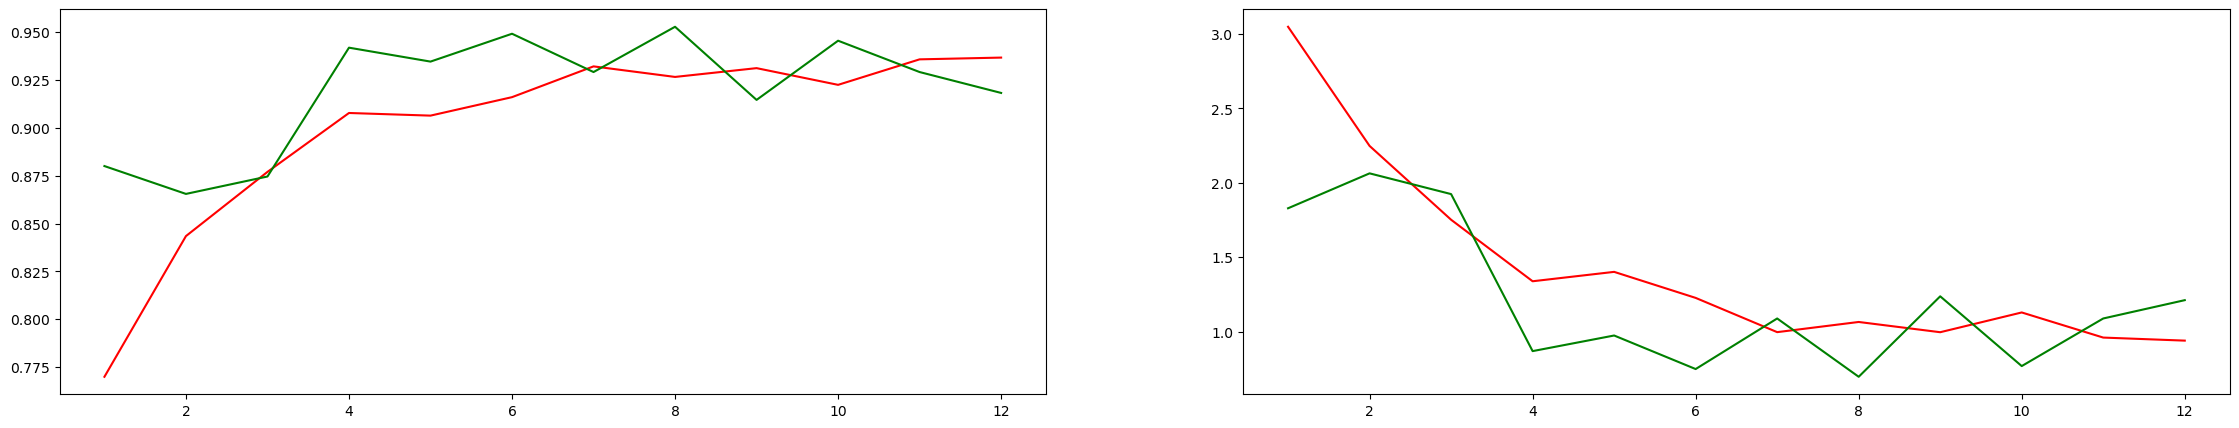

In [33]:
fig,ax=plt.subplots(122,figsize=(28,5))
epochs = [i+1 for i in range(len(train_accuracy))]
print(epochs)
plt.subplot(121)
plt.plot(epochs,train_accuracy,color="red")
plt.plot(epochs,validation_accuracy,color="green")
plt.subplot(122)
plt.plot(epochs,train_loss,color="red")
plt.plot(epochs,validation_loss,color="green")
plt.show()

In [25]:
test_pred=desnet_model.predict(test_batches)

In [26]:
per=np.argmax(test_pred,axis=1)

In [27]:
per[0:32]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
batch,batch_labels=next(test_batches)

In [29]:
class_indices=test_batches.class_indices
calss_label={v: k for k,v in class_indices.items()}

In [30]:
y_true=[0 if calss_label[np.argmax(batch_label)] == "DR" else 1 for batch_label in batch_labels]
y_true=np.squeeze(y_true)
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,per[0:32])

<Axes: >

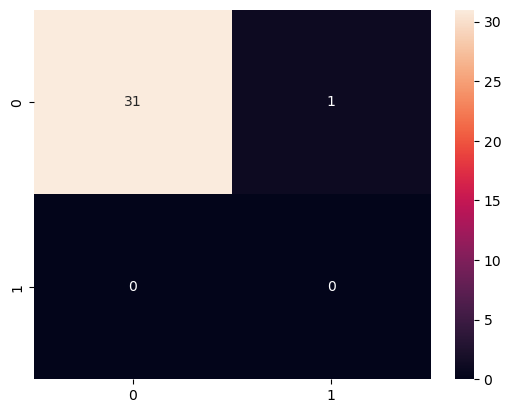

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [45]:
def prediction(path):
    img=cv2.imread(path)
    RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resize_img=cv2.resize(RGB,(224,224))
    plt.imshow(resize_img)
    plt.axis("off")
    image=np.array(resize_img)/255.0
    predict=desnet_model.predict(np.array([image]))
    pre_index=np.argmax(predict,axis=1)
    if pre_index==1:
        print('Diabetic Retinopathy Not Detected')
    else:
        print('Diabetic Retinopathy Detected')
    

Diabetic Retinopathy Not Detected


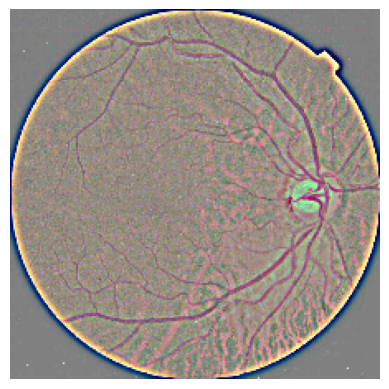

In [46]:
prediction(r"C:\Users\Admin\Jupiter\Retina\test\No_DR\0a38b552372d.png")

In [52]:
desnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               12845312  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

In [53]:
desnet_model.save("./Retina_model.h5")

In [55]:
for entry in os.scandir("."):
    print(entry)

<DirEntry '.ipynb_checkpoints'>
<DirEntry 'gaussian_filtered_images'>
<DirEntry 'Part 1.ipynb'>
<DirEntry 'RetinaModel.ipynb'>
<DirEntry 'Retina_model.h5'>
<DirEntry 'test'>
<DirEntry 'Test Program'>
<DirEntry 'Test Programm.ipynb'>
<DirEntry 'train'>
<DirEntry 'train.csv'>
<DirEntry 'val'>


In [4]:
new_model=tf.keras.models.load_model("./Retina_model.h5")
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               12845312  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

In [12]:
def prediction(path):
    img=cv2.imread(path)
    RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resize_img=cv2.resize(RGB,(224,224))
    plt.imshow(resize_img)
    plt.axis("off")
    image=np.array(resize_img)/255.0
    predict=new_model.predict(np.array([image]))
    pre_index=np.argmax(predict,axis=1)
    if pre_index==1:
        print('Diabetic Retinopathy Not Detected')
    else:
        print('Diabetic Retinopathy Detected')
    

In [13]:
import cv2

In [9]:
sigmaX=10

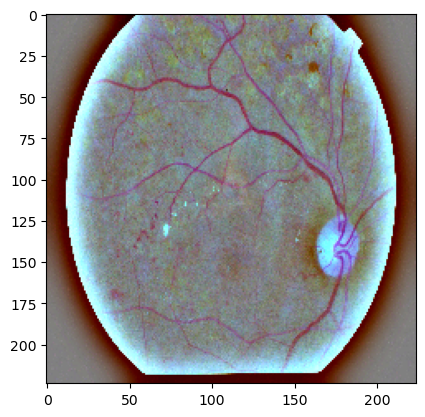

In [10]:
imgs=cv2.imread(r"C:\Users\Admin\Downloads\0083ee8054ee.png")
gaussian = cv2.addWeighted(imgs, 4, cv2.GaussianBlur(imgs, (0,0), sigmaX), -4, 128)
gaussian = cv2.resize(gaussian, (224, 224))
plt.imshow(gaussian)

Diabetic Retinopathy Detected


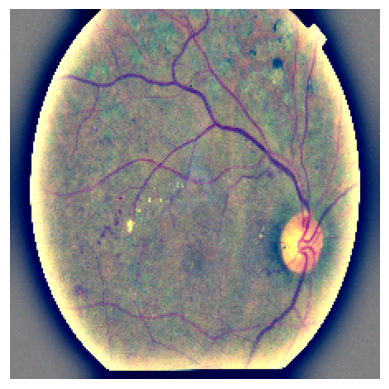

In [11]:
RGB=cv2.cvtColor(gaussian,cv2.COLOR_BGR2RGB)
resize_img=cv2.resize(RGB,(224,224))
plt.imshow(resize_img)
plt.axis("off")
image=np.array(resize_img)/255.0
predict=new_model.predict(np.array([image]))
pre_index=np.argmax(predict,axis=1)
if pre_index==1:
    print('Diabetic Retinopathy Not Detected')
else:
    print('Diabetic Retinopathy Detected')